# ***1. Foundational Knowledge:***
Understand the principles of Recurrent Neural Networks (RNNs), Long Short-Term Memory (LSTM), and Gated Recurrent Unit (GRU) networks.


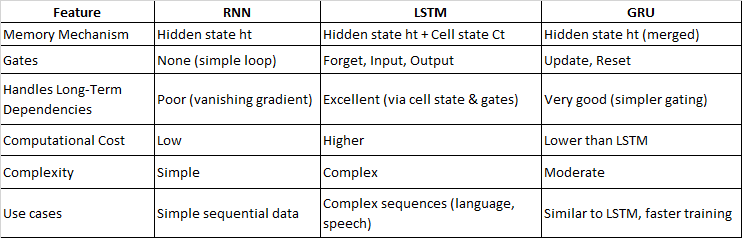

# ***Intuition with a Real-Life Analogy:***
**Vanilla RNN:**
Imagine you’re reading a book one word at a time. After reading a few pages, you try to recall a fact from the very first chapter. It’s hard because your short-term memory fades quickly. This is like an RNN — it remembers recent inputs better but struggles with information far back.

**LSTM:**
Now, imagine you have a notebook where you **write down important facts as you read**. You decide what to write down, what to erase, and what to recall later. This notebook is like the cell state of LSTM — controlled by gates **(write, forget, read)**. You can remember important facts even if they appeared long ago.

**GRU**:
Similar to LSTM but simpler — you have **a smaller notebook with fewer rules** about what to** keep or forget**, making it easier and quicker to use but still pretty effective.



# **1. Recurrent Neural Networks (RNNs)**
**What is an RNN?**
RNNs are a class of neural networks designed to work with sequential data like time series, text, or speech.

Unlike traditional feedforward neural networks, RNNs have a loop inside their architecture that lets information persist.

This means RNNs have a sort of "memory" of previous inputs in the sequence, enabling them to capture temporal dependencies.

**How RNNs work?**
At each time step t, the RNN takes the current input 𝑥𝑡 and the previous hidden state ht−1 , and computes a new hidden state ℎ𝑡
This hidden state is meant to capture information about all previous inputs up to time t.

The output 𝑦𝑡 depends on the hidden state ℎ𝑡.

*Mathematically:*

ℎ𝑡 = tanh(𝑊𝑥ℎ 𝑥𝑡+𝑊ℎℎ ℎ𝑡−1 + 𝑏ℎ)

𝑦𝑡 = 𝑊ℎ𝑦 ℎ𝑡 + 𝑏𝑦

Where:

𝑊𝑥ℎ ,𝑊ℎℎ,𝑊ℎ𝑦 are weight matrices

𝑏ℎ,𝑏𝑦 are biases

tanh is the activation function

**Challenges of RNNs**
Vanishing and exploding gradients: When training RNNs with backpropagation through time (BPTT), gradients can become very small (vanish) or very large (explode), making it hard to learn long-term dependencies.

This means vanilla RNNs often fail to remember information from far earlier in the sequence.

# **2. Long Short-Term Memory Networks (LSTMs)**
**Why LSTMs?**
LSTMs were designed to solve the vanishing gradient problem of RNNs and capture long-term dependencies in sequences.

They introduce a more complex unit called an LSTM cell that can decide what to remember and what to forget.

Structure of LSTM
An LSTM cell has:

Cell state (𝐶𝑡): Acts as a conveyor belt carrying information straight down the sequence with minor linear interactions, helping preserve long-term information.

Gates: These are sigmoid-activated layers that control the flow of information. Specifically:

Forget gate 𝑓𝑡 : Decides what information to discard from the cell state.

Input gate 𝑖𝑡 : Decides which new information to add to the cell state.

Output gate 𝑜𝑡 : Controls the output at the current step.

LSTM Equations

𝑓𝑡 = 𝜎(𝑊𝑓⋅[ℎ𝑡−1,𝑥𝑡]+𝑏𝑓)

𝑖𝑡 = 𝜎(𝑊𝑖⋅[ℎ𝑡−1,𝑥𝑡]+𝑏𝑖)

𝐶~𝑡=tanh⁡(𝑊𝐶⋅[ℎ𝑡−1,𝑥𝑡]+𝑏𝐶)

𝐶𝑡=𝑓𝑡∗𝐶𝑡−1+𝑖𝑡∗𝐶~𝑡

𝑜𝑡=𝜎(𝑊𝑜⋅[ℎ𝑡−1,𝑥𝑡]+𝑏𝑜)

ℎ𝑡=𝑜𝑡∗tanh⁡(𝐶𝑡)


Where:

σ is the sigmoid function (outputs between 0 and 1, acting like a gate).

∗ is element-wise multiplication.

Intuition
The forget gate allows the cell to forget irrelevant parts of previous memory.

The input gate controls how much new information to add.

The output gate controls the output based on the updated cell state.

This gating mechanism allows LSTMs to retain information over long sequences much better than vanilla RNNs.

# **3. Gated Recurrent Unit (GRU)**
**What is GRU?**
GRU is a simplified version of LSTM introduced to reduce complexity while maintaining performance.

It combines the forget and input gates into a single update gate, and merges the cell state and hidden state.

GRU Components
Update gate 𝑧𝑡 : Decides how much of the previous memory to keep.

Reset gate 𝑟𝑡 : Decides how to combine new input with previous memory.

GRU Equations
𝑧𝑡=𝜎(𝑊𝑧⋅[ℎ𝑡−1,𝑥𝑡])

𝑟𝑡=𝜎(𝑊𝑟⋅[ℎ𝑡−1,𝑥𝑡])

ℎ~𝑡=tanh⁡(𝑊⋅[𝑟𝑡∗ℎ𝑡−1,𝑥𝑡])

ℎ𝑡=(1−𝑧𝑡)∗ℎ𝑡−1+𝑧𝑡∗ℎ~𝑡

Intuition
The update gate controls the balance between keeping the old state and adding new information.

The reset gate controls how much past information to forget.

GRUs often train faster and require fewer parameters than LSTMs but can perform just as well on many tasks.

# ***Recognize the advantages of LSTMs and GRUs in capturing long-term dependencies in sequential data.***

**Identify the key differences between LSTM and GRU architectures (e.g., number of gates, training efficiency, performance on small datasets).**

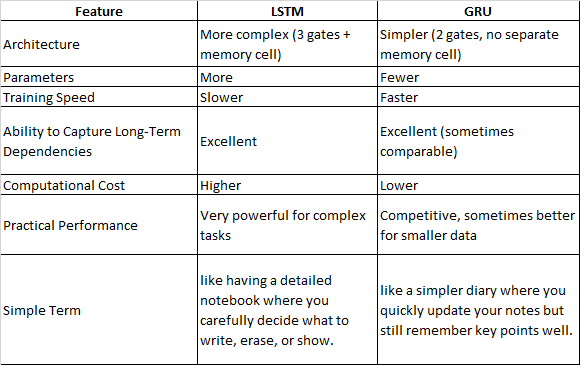

# ***2. Data Exploration:***
Analyze the dataset's structure and characteristics, paying particular attention to the sequential nature of the text data.

Explore preprocessing techniques for text data, such as tokenization and sequence generation.



In [35]:
#Step 2: Load and Preview the Dataset
# Import necessary libraries
import nltk
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the Pride and Prejudice text file
file_path = 'LSTM DATA.txt'

# Read the text file
with open(file_path, 'r', encoding='utf-8') as file:
    text_data = file.read()

# Preview the first 1000 characters of the text
print(text_data[:1000])


﻿The Project Gutenberg eBook of Pride and Prejudice
    
This ebook is for the use of anyone anywhere in the United States and
most other parts of the world at no cost and with almost no restrictions
whatsoever. You may copy it, give it away or re-use it under the terms
of the Project Gutenberg License included with this ebook or online
at www.gutenberg.org. If you are not located in the United States,
you will have to check the laws of the country where you are located
before using this eBook.

Title: Pride and Prejudice


Author: Jane Austen

Release date: June 1, 1998 [eBook #1342]
                Most recently updated: April 14, 2023

Language: English

Credits: Chuck Greif and the Online Distributed Proofreading Team at http://www.pgdp.net (This file was produced from images available at The Internet Archive)


*** START OF THE PROJECT GUTENBERG EBOOK PRIDE AND PREJUDICE ***




                            [Illustration:

                             GEORGE ALLEN
                 

In [ ]:
!pip install spacy
!python -m spacy download en_core_web_sm
!pip install -U NLTK

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 57.0 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


In [37]:
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


True

In [39]:
!pip install scipy

In [38]:
#Step 3: Basic Text Analysis
# Import nltk
nltk.download('punkt')
from nltk.tokenize import word_tokenize, sent_tokenize

# Tokenize into sentences and words
sentences = sent_tokenize(text_data)
words = word_tokenize(text_data)

# Get some basic text statistics
num_characters = len(text_data)
num_words = len(words)
num_sentences = len(sentences)
avg_sentence_length = num_words / num_sentences

# Print basic stats
print(f"Number of Characters: {num_characters}")
print(f"Number of Words: {num_words}")
print(f"Number of Sentences: {num_sentences}")
print(f"Average Sentence Length: {avg_sentence_length:.2f} words")


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


Number of Characters: 748151
Number of Words: 154438
Number of Sentences: 4916
Average Sentence Length: 31.42 words


[(',', 9993), ('the', 4520), ('.', 4366), ('to', 4316), ('of', 3933), ('and', 3665), ('her', 2163), ('I', 2097), ('a', 2036), ('in', 1944), ('“', 1930), ('”', 1898), ('was', 1868), (';', 1704), ('not', 1597), ('that', 1575), ('she', 1408), ('it', 1317), ('be', 1274), ('his', 1205)]


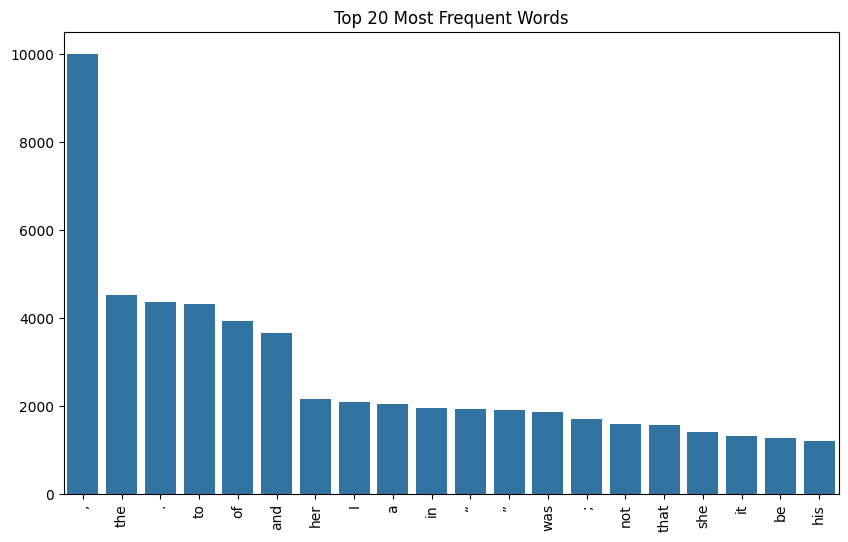

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


Number of Characters: 748151
Number of Words: 154438
Number of Sentences: 4916
Average Sentence Length: 31.42 words


In [40]:
#Step 4: Word Frequency Analysis
#basic text analysis
from collections import Counter

# Get word frequency count
word_freq = Counter(words)

# Get the top 20 most frequent words
top_words = word_freq.most_common(20)
print(top_words)

# Plot word frequency
word_list, freq_list = zip(*top_words)
plt.figure(figsize=(10,6))
sns.barplot(x=list(word_list), y=list(freq_list))
plt.title('Top 20 Most Frequent Words')
plt.xticks(rotation=90)
plt.show()
# Import nltk
nltk.download('punkt')
from nltk.tokenize import word_tokenize, sent_tokenize

# Tokenize into sentences and words
sentences = sent_tokenize(text_data)
words = word_tokenize(text_data)

# Get some basic text statistics
num_characters = len(text_data)
num_words = len(words)
num_sentences = len(sentences)
avg_sentence_length = num_words / num_sentences

# Print basic stats
print(f"Number of Characters: {num_characters}")
print(f"Number of Words: {num_words}")
print(f"Number of Sentences: {num_sentences}")
print(f"Average Sentence Length: {avg_sentence_length:.2f} words")


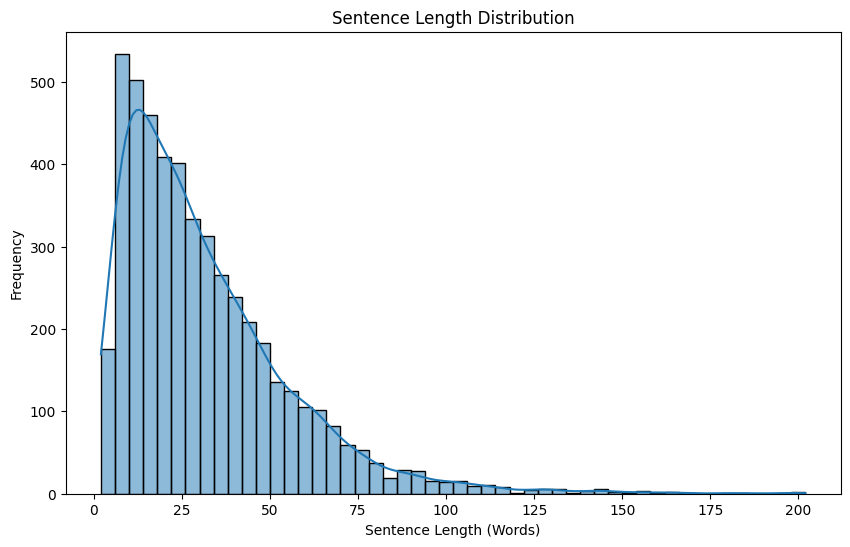

Average Sentence Length: 31.42 words
Sentence Length Standard Deviation: 24.10


In [ ]:
#Step 5: Sentence Length Distribution
# Calculate sentence lengths (in terms of words)
sentence_lengths = [len(word_tokenize(sentence)) for sentence in sentences]

# Plot the sentence length distribution
plt.figure(figsize=(10,6))
sns.histplot(sentence_lengths, bins=50, kde=True)
plt.title('Sentence Length Distribution')
plt.xlabel('Sentence Length (Words)')
plt.ylabel('Frequency')
plt.show()

# Summary statistics
print(f"Average Sentence Length: {np.mean(sentence_lengths):.2f} words")
print(f"Sentence Length Standard Deviation: {np.std(sentence_lengths):.2f}")


In [41]:
#Step 6: Text Preprocessing for Sequential Models
from nltk.corpus import stopwords
nltk.download('stopwords')
import re

# Remove stopwords
stop_words = set(stopwords.words('english'))

# Function to clean and tokenize text
def clean_text(text):
    # Lowercase the text
    text = text.lower()

    # Remove non-alphabetic characters (keeping only letters and spaces)
    text = re.sub(r'[^a-z\s]', '', text)

    # Tokenize and remove stopwords
    tokens = word_tokenize(text)
    tokens = [word for word in tokens if word not in stop_words]

    return tokens

# Clean and tokenize the entire text
cleaned_text = clean_text(text_data)

# Preview the first 20 cleaned tokens
print(cleaned_text[:20])


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


['project', 'gutenberg', 'ebook', 'pride', 'prejudice', 'ebook', 'use', 'anyone', 'anywhere', 'united', 'states', 'parts', 'world', 'cost', 'almost', 'restrictions', 'whatsoever', 'may', 'copy', 'give']


In [ ]:
#Step 7: Sequential Nature of Text
from sklearn.feature_extraction.text import CountVectorizer

# Extract bigrams
vectorizer = CountVectorizer(ngram_range=(2, 2), max_features=10)
X = vectorizer.fit_transform([' '.join(cleaned_text)])

# Get top 10 bigrams
top_bigrams = vectorizer.get_feature_names_out()
print("Top Bigrams:", top_bigrams)

# Extract trigrams
vectorizer3 = CountVectorizer(ngram_range=(3, 3), max_features=10)
X3 = vectorizer3.fit_transform([' '.join(cleaned_text)])

# Get top 10 trigrams
top_trigrams = vectorizer3.get_feature_names_out()
print("Top Trigrams:", top_trigrams)


Top Bigrams: ['lady catherine' 'miss bennet' 'miss bingley' 'mr bennet' 'mr bingley'
 'mr collins' 'mr darcy' 'mr wickham' 'mrs bennet' 'project gutenberg']
Top Trigrams: ['catherine de bourgh' 'copyright george allen' 'george allen chapter'
 'gutenberg literary archive' 'lady catherine de'
 'literary archive foundation' 'miss de bourgh'
 'project gutenberg electronic' 'project gutenberg literary'
 'said mrs bennet']


In [ ]:
#Step 8: Text Sample and Sequential Relationships
# Get a sample of consecutive sentences
for i in range(5, 10):
    print(f"Sentence {i}: {sentences[i-1]}")
    print(f"Sentence {i+1}: {sentences[i]}")
    print("------")


Sentence 5: and
                               PREJUDICE

                                  by
                             Jane Austen,

                           with a Preface by
                           George Saintsbury
                                  and
                           Illustrations by
                             Hugh Thomson

                         [Illustration: 1894]

                       Ruskin       156.
Sentence 6: Charing
                       House.
------
Sentence 6: Charing
                       House.
Sentence 7: Cross Road.
------
Sentence 7: Cross Road.
Sentence 8: London
                             George Allen.
------
Sentence 8: London
                             George Allen.
Sentence 9: CHISWICK PRESS:--CHARLES WHITTINGHAM AND CO.
                  TOOKS COURT, CHANCERY LANE, LONDON.
------
Sentence 9: CHISWICK PRESS:--CHARLES WHITTINGHAM AND CO.
                  TOOKS COURT, CHANCERY LANE, LONDON.
Sentence 10: [Illustration:

        

# ***3. Preprocessing and Feature Engineering:***
Preprocess the textual data by converting it into sequences of fixed length suitable for input to RNN models.


Tokenize the text data and generate input sequences with corresponding output labels (next words).


In [42]:
#Step 1: Load the Text and Clean It
import urllib.request

# Load the Pride and Prejudice text file
file_path = 'LSTM DATA.txt'

# Read the text file
with open(file_path, 'r', encoding='utf-8') as file:
    text_data = file.read()

# Preview the first 1000 characters of the text
#print(text_data[:1000])

# Clean up the text by removing metadata (Project Gutenberg header/footer)
start_index = text_data.find("START OF THE PROJECT GUTENBERG EBOOK PRIDE AND PREJUDICE")
end_index = text_data.find("END OF THE PROJECT GUTENBERG EBOOK PRIDE AND PREJUDICE")
print(end_index)
# Extract the main text content
cleaned_text = text_data[start_index:end_index].strip()

# Preview the cleaned text
print(cleaned_text[:1000])  # Preview the first 1000 characters of the text
#print(text)


729661
START OF THE PROJECT GUTENBERG EBOOK PRIDE AND PREJUDICE ***




                            [Illustration:

                             GEORGE ALLEN
                               PUBLISHER

                        156 CHARING CROSS ROAD
                                LONDON

                             RUSKIN HOUSE
                                   ]

                            [Illustration:

               _Reading Jane’s Letters._      _Chap 34._
                                   ]




                                PRIDE.
                                  and
                               PREJUDICE

                                  by
                             Jane Austen,

                           with a Preface by
                           George Saintsbury
                                  and
                           Illustrations by
                             Hugh Thomson

                         [Illustration: 1894]

                       Ruskin 

In [43]:
#Step 2: Tokenization
from nltk.tokenize import word_tokenize
import nltk

# Download necessary NLTK resources
nltk.download('punkt')

# Tokenize the text into words
tokens = word_tokenize(cleaned_text)

# Preview the first 20 tokens
print(tokens[:20])


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


['START', 'OF', 'THE', 'PROJECT', 'GUTENBERG', 'EBOOK', 'PRIDE', 'AND', 'PREJUDICE', '*', '*', '*', '[', 'Illustration', ':', 'GEORGE', 'ALLEN', 'PUBLISHER', '156', 'CHARING']


In [ ]:
#Step 3: Remove Stopwords (Optional)
from nltk.corpus import stopwords

# Download the stopwords list from NLTK
nltk.download('stopwords')

# Get the set of English stopwords
stop_words = set(stopwords.words('english'))

# Filter out stopwords from the tokens
filtered_tokens = [word for word in tokens if word.lower() not in stop_words]

# Preview the first 20 filtered tokens
print(filtered_tokens[:20])


['START', 'PROJECT', 'GUTENBERG', 'EBOOK', 'PRIDE', 'PREJUDICE', '*', '*', '*', '[', 'Illustration', ':', 'GEORGE', 'ALLEN', 'PUBLISHER', '156', 'CHARING', 'CROSS', 'ROAD', 'LONDON']


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
#Step 4: Convert Tokens to Lowercase
# Convert all tokens to lowercase
lowercase_tokens = [word.lower() for word in filtered_tokens]

# Preview the first 20 tokens after lowercasing
print(lowercase_tokens[:20])


['start', 'project', 'gutenberg', 'ebook', 'pride', 'prejudice', '*', '*', '*', '[', 'illustration', ':', 'george', 'allen', 'publisher', '156', 'charing', 'cross', 'road', 'london']


In [ ]:
#Step 5: Sequence Generation
# Define the length of the sequence (how many tokens in each sequence)
sequence_length = 5

# Create sequences of tokens (X) and their corresponding labels (y)
sequences = []
for i in range(len(lowercase_tokens) - sequence_length):
    sequence = lowercase_tokens[i:i + sequence_length]  # Input sequence
    next_word = lowercase_tokens[i + sequence_length]  # Target word (next word)
    sequences.append((sequence, next_word))

# Preview the first 5 sequences
for seq in sequences[:5]:
    print(f"Input sequence: {seq[0]} => Target: {seq[1]}")


Input sequence: ['start', 'project', 'gutenberg', 'ebook', 'pride'] => Target: prejudice
Input sequence: ['project', 'gutenberg', 'ebook', 'pride', 'prejudice'] => Target: *
Input sequence: ['gutenberg', 'ebook', 'pride', 'prejudice', '*'] => Target: *
Input sequence: ['ebook', 'pride', 'prejudice', '*', '*'] => Target: *
Input sequence: ['pride', 'prejudice', '*', '*', '*'] => Target: [


In [ ]:
#Step 6: Convert Sequences to Integer Representation
# Create a dictionary that maps words to integers (word index)
word_to_index = {word: idx + 1 for idx, word in enumerate(set(lowercase_tokens))}  # +1 to reserve 0 for padding

# Convert the sequences and target words to integers
X = [[word_to_index[word] for word in sequence] for sequence, _ in sequences]
y = [word_to_index[next_word] for _, next_word in sequences]

# Preview the first 5 sequences and their labels
for i in range(5):
    print(f"Input: {X[i]} => Target: {y[i]}")


Input: [3104, 7585, 1979, 3012, 7141] => Target: 827
Input: [7585, 1979, 3012, 7141, 827] => Target: 4213
Input: [1979, 3012, 7141, 827, 4213] => Target: 4213
Input: [3012, 7141, 827, 4213, 4213] => Target: 4213
Input: [7141, 827, 4213, 4213, 4213] => Target: 6878


In [ ]:
#Step 7: Padding Sequences (Optional)
from tensorflow.keras.preprocessing.sequence import pad_sequences

# Pad sequences to ensure all sequences have the same length
X_padded = pad_sequences(X, padding='post')

# Preview padded sequences
print(X_padded[:5])


[[3104 7585 1979 3012 7141]
 [7585 1979 3012 7141  827]
 [1979 3012 7141  827 4213]
 [3012 7141  827 4213 4213]
 [7141  827 4213 4213 4213]]


***Summary of Steps***

Load and clean the text by removing unwanted metadata.

Tokenize the text into individual words.

Remove stopwords (optional).

Convert tokens to lowercase for consistency.

Generate sequences by sliding over the tokenized text to create sequences of fixed length.

Map each word to an integer (word index) for RNN compatibility.

Pad sequences if necessary (though it may not be needed for fixed-length sequences).

# ***4. Model Architecture (LSTM & GRU):***
Define the architecture of both LSTM and GRU models, including the number of recurrent layers, hidden units, and embedding dimensions.


Compare the network complexity, training time, and performance between LSTM and GRU.


***1. LSTM Model Architecture***

LSTM (Long Short-Term Memory) is designed to capture long-term dependencies in sequential data by maintaining memory over time. It uses three gates (input gate, forget gate, and output gate) to control the flow of information.

**LSTM Model Structure:**

**Embedding Layer:** Converts the input words (or tokens) into dense vectors. The embedding layer learns the representations for words in a continuous vector space.

**LSTM Layers:** One or more LSTM layers, each with a number of hidden units, to process the sequential data and learn dependencies.

**Dense Layer:** A fully connected layer to map the output from the LSTM layers to the prediction space (e.g., predicting the next word or sequence).

**Output Layer:** Usually a softmax activation function for multi-class classification tasks, like text generation.

# ***2. GRU Model Architecture***

GRU (Gated Recurrent Unit) is a simpler alternative to LSTM. It combines the forget and input gates into a single update gate and uses a reset gate. It has fewer parameters compared to LSTM, making it faster to train while still capturing relevant sequential dependencies.

**GRU Model Structure:**

**Embedding Layer:** Like LSTM, the embedding layer converts input tokens to dense vectors.

**GRU Layers:** One or more GRU layers with a number of hidden units to capture sequential patterns.

**Dense Layer:** A fully connected layer to map the output to the prediction space.

**Output Layer:** Typically a softmax activation function for generating the output sequence or making predictions.

In [ ]:
import numpy as np
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.sequence import pad_sequences

# Simple dataset with sentences
sentences = [
    "I love machine learning",
    "Deep learning is amazing",
    "I love deep learning",
    "Machine learning is great",
    "Deep learning is the future"
]

# Initialize the tokenizer
tokenizer = Tokenizer()

# Fit the tokenizer on the sentences (this will tokenize the text)
tokenizer.fit_on_texts(sentences)

# Convert text to sequences of integers (word indices)
sequences = tokenizer.texts_to_sequences(sentences)

# Print the tokenized sequences
print("Tokenized sequences:", sequences)

# Define the vocabulary size (number of unique words)
vocab_size = len(tokenizer.word_index) + 1  # +1 for padding

# Create input-output pairs (sequences and next word)
X = []
y = []

# Loop through sequences and create input-output pairs
for seq in sequences:
    for i in range(1, len(seq)):
        X.append(seq[:i])  # Input sequence (all words before the target word)
        y.append(seq[i])  # Next word (target word)

# Pad sequences to make them the same length
X = pad_sequences(X, padding='pre')

# One-hot encode the target variable (y)
y = to_categorical(y, num_classes=vocab_size)

# Convert X to numpy arrays
X = np.array(X)
y = np.array(y)

# Print shapes of input and output
print(f"Shape of X: {X.shape}, Shape of y: {y.shape}")


Tokenized sequences: [[4, 5, 6, 1], [2, 1, 3, 7], [4, 5, 2, 1], [6, 1, 3, 8], [2, 1, 3, 9, 10]]
Shape of X: (16, 4), Shape of y: (16, 11)


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense

# Define the LSTM model
model_lstm = Sequential()

# Embedding layer
model_lstm.add(Embedding(input_dim=vocab_size, output_dim=10, input_length=X.shape[1]))

# LSTM layer with 50 hidden units
model_lstm.add(LSTM(50))

# Dense layer for next word prediction
model_lstm.add(Dense(vocab_size, activation='softmax'))

# Compile the model
model_lstm.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Model summary
model_lstm.summary()


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding (Embedding)           │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm (LSTM)                     │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [ ]:
from tensorflow.keras.layers import GRU

# Define the GRU model
model_gru = Sequential()

# Embedding layer
model_gru.add(Embedding(input_dim=vocab_size, output_dim=10, input_length=X.shape[1]))

# GRU layer with 50 hidden units
model_gru.add(GRU(50))

# Dense layer for next word prediction
model_gru.add(Dense(vocab_size, activation='softmax'))

# Compile the model
model_gru.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Model summary
model_gru.summary()


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_1 (Embedding)         │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ gru (GRU)                       │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# Train the LSTM model
history_lstm = model_lstm.fit(X, y, epochs=50, batch_size=4, verbose=1)

# Train the GRU model
history_gru = model_gru.fit(X, y, epochs=50, batch_size=4, verbose=1)


Epoch 1/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - accuracy: 0.2083 - loss: 2.3956
Epoch 2/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.4750 - loss: 2.3854 
Epoch 3/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.2250 - loss: 2.3800    
Epoch 4/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.3500 - loss: 2.3691
Epoch 5/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.4000 - loss: 2.3537 
Epoch 6/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.3917 - loss: 2.3447
Epoch 7/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.4333 - loss: 2.3181
Epoch 8/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.2250 - loss: 2.3173     
Epoch 9/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.3667 - loss: 2.2880
Epoch 10/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.2500 - loss: 2.2927    
Epoch 11/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.2667 - loss: 2.2427     
Epoch 12/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.3167 

In [ ]:
import time

# Record the training time for LSTM
start_time = time.time()
history_lstm = model_lstm.fit(X, y, epochs=50, batch_size=4, verbose=0)
lstm_training_time = time.time() - start_time

# Record the training time for GRU
start_time = time.time()
history_gru = model_gru.fit(X, y, epochs=50, batch_size=4, verbose=0)
gru_training_time = time.time() - start_time

print(f"LSTM Training Time: {lstm_training_time:.2f} seconds")
print(f"GRU Training Time: {gru_training_time:.2f} seconds")


LSTM Training Time: 3.73 seconds
GRU Training Time: 3.41 seconds


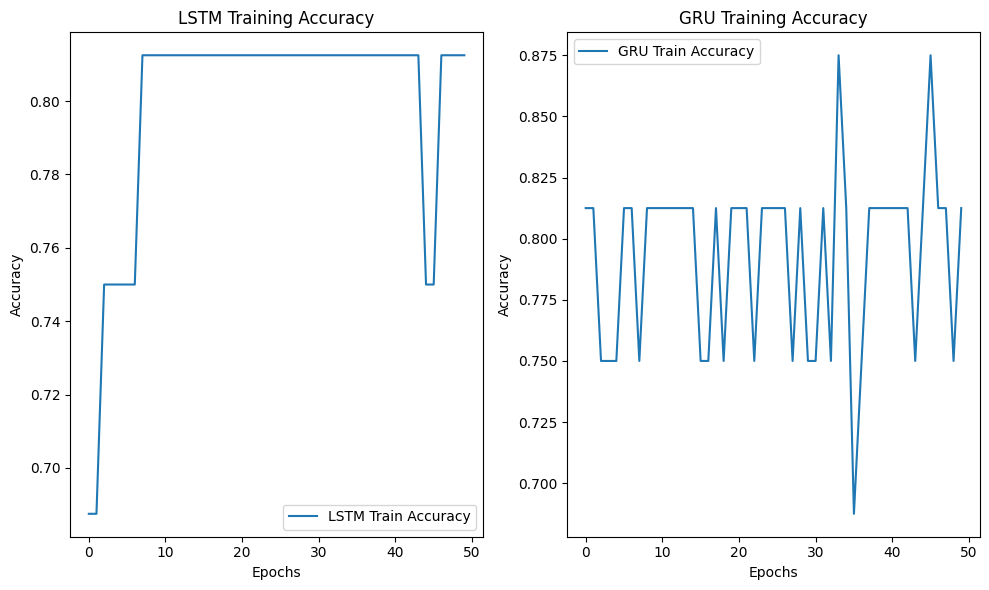

In [ ]:
import matplotlib.pyplot as plt

# Plot accuracy comparison
plt.figure(figsize=(10, 6))

# LSTM Accuracy Plot
plt.subplot(1, 2, 1)
plt.plot(history_lstm.history['accuracy'], label='LSTM Train Accuracy')
plt.title('LSTM Training Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# GRU Accuracy Plot
plt.subplot(1, 2, 2)
plt.plot(history_gru.history['accuracy'], label='GRU Train Accuracy')
plt.title('GRU Training Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()


# ***5. Building the Models:***
Build both models using TensorFlow/Keras layers:


Use Embedding layers for input representations.


**For LSTM:** Use LSTM() layers.


**For GRU:** Use GRU() layers.


Compile the models with appropriate loss functions (e.g., categorical crossentropy) and optimizers (e.g., Adam).


In [44]:
# Simple dataset with sentences
sentences = [
    "I love machine learning",
    "Deep learning is amazing",
    "I love deep learning",
    "Machine learning is great",
    "Deep learning is the future"
]

from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.sequence import pad_sequences
import numpy as np

# Initialize the tokenizer
tokenizer = Tokenizer()
tokenizer.fit_on_texts(sentences)

# Convert text to sequences of integers (word indices)
sequences = tokenizer.texts_to_sequences(sentences)

# Define the vocabulary size (number of unique words)
vocab_size = len(tokenizer.word_index) + 1  # +1 for padding

# Create input-output pairs (sequences and next word)
X = []
y = []

# Loop through sequences and create input-output pairs
for seq in sequences:
    for i in range(1, len(seq)):
        X.append(seq[:i])  # Input sequence (all words before the target word)
        y.append(seq[i])  # Next word (target word)

# Pad sequences to make them the same length
X = pad_sequences(X, padding='pre')

# One-hot encode the target variable (y)
y = to_categorical(y, num_classes=vocab_size)

# Convert X to numpy arrays
X = np.array(X)
y = np.array(y)

# Print shapes of input and output
print(f"Shape of X: {X.shape}, Shape of y: {y.shape}")


Shape of X: (16, 4), Shape of y: (16, 11)


In [45]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense

# Define the LSTM model
model_lstm = Sequential()

# Embedding layer: vocab_size = size of the vocabulary, 50 is the embedding dimension
model_lstm.add(Embedding(input_dim=vocab_size, output_dim=50, input_length=X.shape[1]))

# LSTM layer with 128 hidden units
model_lstm.add(LSTM(128))

# Dense layer for next word prediction (output size = vocab_size)
model_lstm.add(Dense(vocab_size, activation='softmax'))

# Compile the model
model_lstm.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Model summary
model_lstm.summary()


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding (Embedding)           │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm (LSTM)                     │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [46]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, GRU, Dense

# Define the GRU model
model_gru = Sequential()

# Embedding layer
model_gru.add(Embedding(input_dim=vocab_size, output_dim=50, input_length=X.shape[1]))

# GRU layer with 128 hidden units
model_gru.add(GRU(128))

# Dense layer for next word prediction
model_gru.add(Dense(vocab_size, activation='softmax'))

# Compile the model
model_gru.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Model summary
model_gru.summary()


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_1 (Embedding)         │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ gru (GRU)                       │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [47]:
# Train the LSTM model
history_lstm = model_lstm.fit(X, y, epochs=50, batch_size=4, verbose=1)

# Train the GRU model
history_gru = model_gru.fit(X, y, epochs=50, batch_size=4, verbose=1)


Epoch 1/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 3s 13ms/step - accuracy: 0.0250 - loss: 2.3942  
Epoch 2/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.2333 - loss: 2.3703 
Epoch 3/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.3583 - loss: 2.3305 
Epoch 4/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.2417 - loss: 2.3131    
Epoch 5/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.2917 - loss: 2.2269
Epoch 6/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.2667 - loss: 2.1995
Epoch 7/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.2500 - loss: 2.0821
Epoch 8/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.3833 - loss: 1.8614
Epoch 9/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.2667 - loss: 1.9970
Epoch 10/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.3667 - loss: 1.7391 
Epoch 11/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.3167 - loss: 1.7729
Epoch 12/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.2750 - loss:

In [ ]:
import time

# Measure training time for LSTM
start_time = time.time()
history_lstm = model_lstm.fit(X, y, epochs=10, batch_size=4, verbose=0)
lstm_training_time = time.time() - start_time

# Measure training time for GRU
start_time = time.time()
history_gru = model_gru.fit(X, y, epochs=10, batch_size=4, verbose=0)
gru_training_time = time.time() - start_time

print(f"LSTM Training Time: {lstm_training_time:.2f} seconds")
print(f"GRU Training Time: {gru_training_time:.2f} seconds")


LSTM Training Time: 1.19 seconds
GRU Training Time: 0.60 seconds


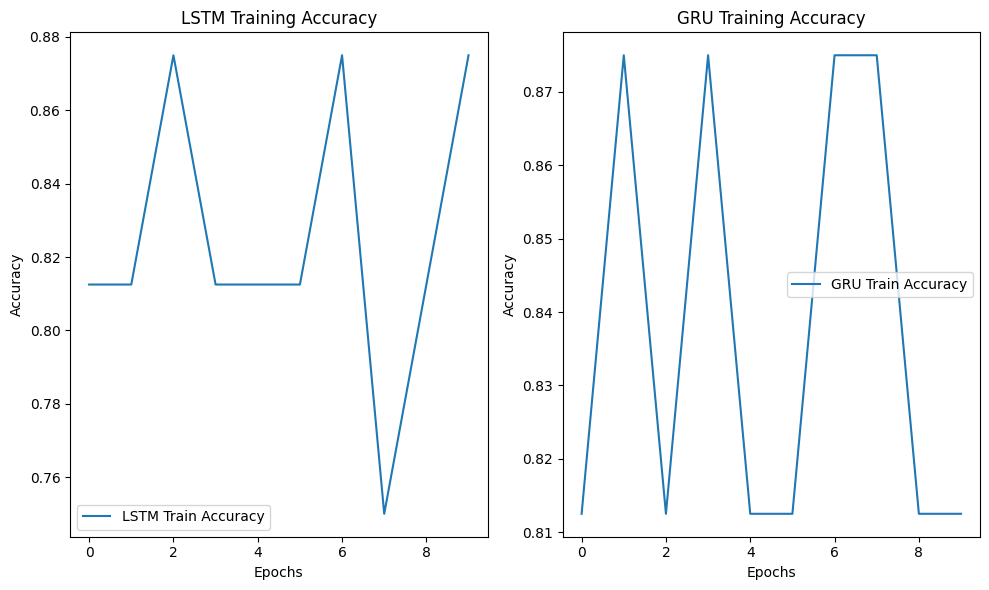

In [ ]:
import matplotlib.pyplot as plt

# Plot training accuracy comparison
plt.figure(figsize=(10, 6))

# LSTM Training Accuracy
plt.subplot(1, 2, 1)
plt.plot(history_lstm.history['accuracy'], label='LSTM Train Accuracy')
plt.title('LSTM Training Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# GRU Training Accuracy
plt.subplot(1, 2, 2)
plt.plot(history_gru.history['accuracy'], label='GRU Train Accuracy')
plt.title('GRU Training Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()



# **6. Model Training:**
Train both LSTM and GRU models on the training data.


Specify the number of epochs and batch size.


Monitor training progress using loss curves.


Implement overfitting prevention techniques like:


Dropout


EarlyStopping


In [ ]:
from tensorflow.keras.layers import Dropout

# Define the LSTM model with Dropout
model_lstm = Sequential()

# Embedding layer
model_lstm.add(Embedding(input_dim=vocab_size, output_dim=50, input_length=X.shape[1]))

# LSTM layer with 128 hidden units
model_lstm.add(LSTM(128, return_sequences=False))

# Dropout to prevent overfitting
model_lstm.add(Dropout(0.2))

# Dense layer for next word prediction
model_lstm.add(Dense(vocab_size, activation='softmax'))

# Compile the model
model_lstm.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Model summary
model_lstm.summary()


Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_4 (Embedding)         │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_2 (LSTM)                   │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# Define the GRU model with Dropout
model_gru = Sequential()

# Embedding layer
model_gru.add(Embedding(input_dim=vocab_size, output_dim=50, input_length=X.shape[1]))

# GRU layer with 128 hidden units
model_gru.add(GRU(128, return_sequences=False))

# Dropout to prevent overfitting
model_gru.add(Dropout(0.2))

# Dense layer for next word prediction
model_gru.add(Dense(vocab_size, activation='softmax'))

# Compile the model
model_gru.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Model summary
model_gru.summary()


Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_5 (Embedding)         │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ gru_2 (GRU)                     │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout
from tensorflow.keras.optimizers import Adam

def build_lstm_model(learning_rate=0.001, hidden_units=128, sequence_length=50):
    model = Sequential()

    # Embedding layer: input_dim is vocab_size, output_dim is the embedding size, input_length is sequence length
    model.add(Embedding(input_dim=vocab_size, output_dim=50, input_length=sequence_length))

    # LSTM layer with the specified number of hidden units
    model.add(LSTM(hidden_units))

    # Dropout layer to prevent overfitting
    model.add(Dropout(0.2))

    # Output layer with softmax activation (predict next word from vocab size)
    model.add(Dense(vocab_size, activation='softmax'))

    # Compile the model
    model.compile(loss='categorical_crossentropy', optimizer=Adam(learning_rate=learning_rate), metrics=['accuracy'])

    return model

# Build the model with default hyperparameters
lstm_model = build_lstm_model()

# Model summary
lstm_model.summary()


Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_6 (Embedding)         │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_3 (LSTM)                   │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping

# Initialize EarlyStopping to monitor validation loss
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)


In [ ]:
import matplotlib.pyplot as plt

# Train the LSTM model
history_lstm = model_lstm.fit(X, y, epochs=50, batch_size=4, validation_split=0.2, verbose=1, callbacks=[early_stopping])

# Train the GRU model
history_gru = model_gru.fit(X, y, epochs=50, batch_size=4, validation_split=0.2, verbose=1, callbacks=[early_stopping])


Epoch 1/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 3s 196ms/step - accuracy: 0.2188 - loss: 2.3939 - val_accuracy: 0.2500 - val_loss: 2.3932
Epoch 2/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - accuracy: 0.4583 - loss: 2.3785 - val_accuracy: 0.2500 - val_loss: 2.3843
Epoch 3/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - accuracy: 0.2604 - loss: 2.3645 - val_accuracy: 0.2500 - val_loss: 2.3747
Epoch 4/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - accuracy: 0.3854 - loss: 2.3375 - val_accuracy: 0.2500 - val_loss: 2.3620
Epoch 5/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - accuracy: 0.3854 - loss: 2.3124 - val_accuracy: 0.2500 - val_loss: 2.3460
Epoch 6/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - accuracy: 0.3854 - loss: 2.2801 - val_accuracy: 0.2500 - val_loss: 2.3240
Epoch 7/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - accuracy: 0.3542 - loss: 2.2336 - val_accuracy: 0.2500 - val_loss: 2.2951
Epoch 8/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - accuracy: 0.2604 - loss: 2.2244 - val_accuracy: 0.2500 - val_loss: 2.2634

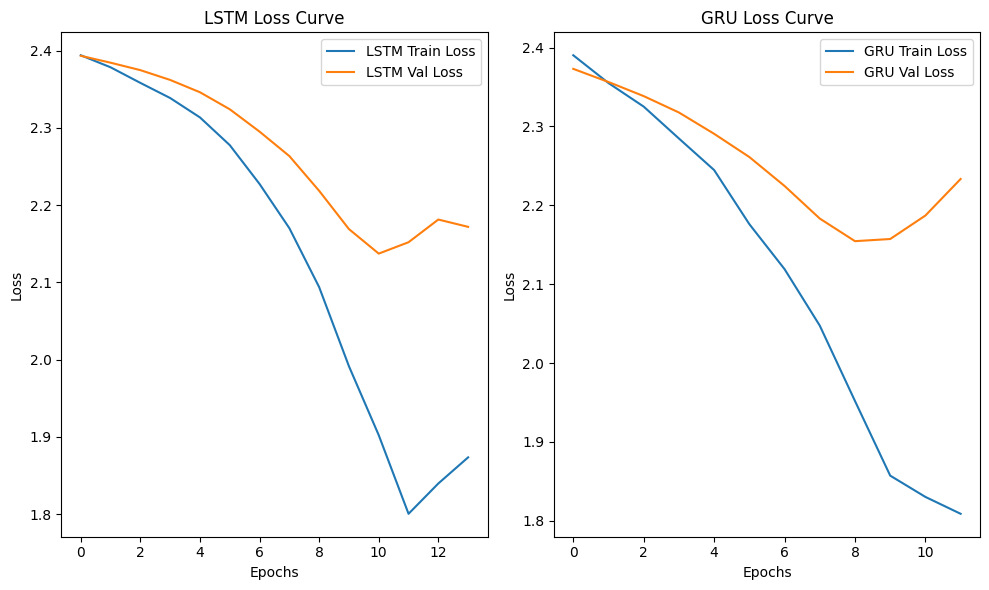

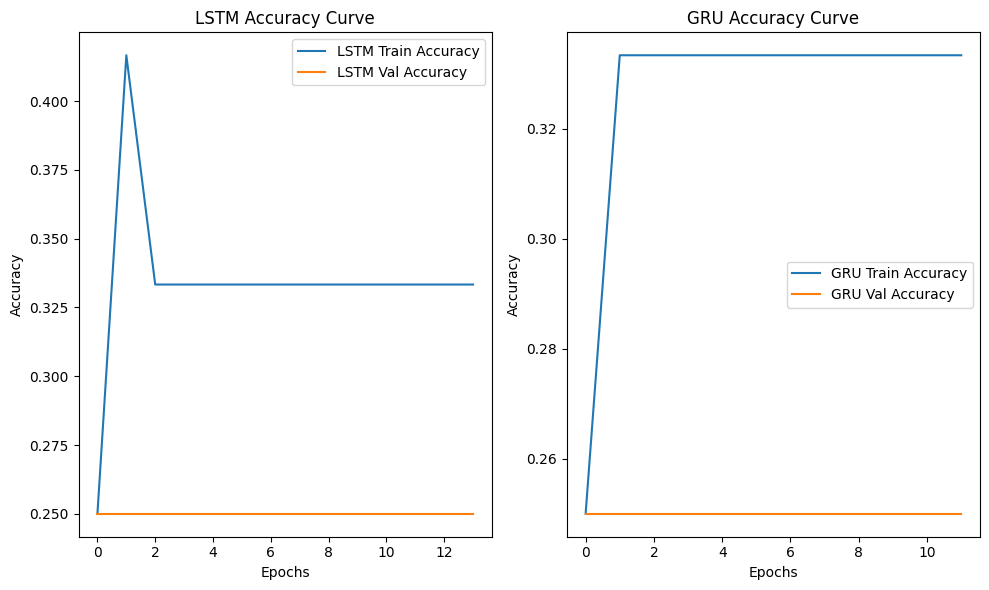

In [ ]:
# Plot training and validation loss for LSTM
plt.figure(figsize=(10, 6))

# LSTM Loss Plot
plt.subplot(1, 2, 1)
plt.plot(history_lstm.history['loss'], label='LSTM Train Loss')
plt.plot(history_lstm.history['val_loss'], label='LSTM Val Loss')
plt.title('LSTM Loss Curve')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# GRU Loss Plot
plt.subplot(1, 2, 2)
plt.plot(history_gru.history['loss'], label='GRU Train Loss')
plt.plot(history_gru.history['val_loss'], label='GRU Val Loss')
plt.title('GRU Loss Curve')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

# Plot training and validation accuracy for LSTM
plt.figure(figsize=(10, 6))

# LSTM Accuracy Plot
plt.subplot(1, 2, 1)
plt.plot(history_lstm.history['accuracy'], label='LSTM Train Accuracy')
plt.plot(history_lstm.history['val_accuracy'], label='LSTM Val Accuracy')
plt.title('LSTM Accuracy Curve')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# GRU Accuracy Plot
plt.subplot(1, 2, 2)
plt.plot(history_gru.history['accuracy'], label='GRU Train Accuracy')
plt.plot(history_gru.history['val_accuracy'], label='GRU Val Accuracy')
plt.title('GRU Accuracy Curve')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()


# ***7. Model Evaluation:***
Evaluate both models on the testing/validation data using appropriate evaluation metrics (e.g., accuracy, perplexity).


Analyze model predictions for a set of input sequences and interpret output quality.


Compare and contrast performance between LSTM and GRU.


In [48]:
# Evaluate LSTM model on validation data
lstm_eval = model_lstm.evaluate(X, y, verbose=1)

# Evaluate GRU model on validation data
gru_eval = model_gru.evaluate(X, y, verbose=1)

# Print evaluation results
print(f"LSTM Loss: {lstm_eval[0]:.4f}, LSTM Accuracy: {lstm_eval[1]:.4f}")
print(f"GRU Loss: {gru_eval[0]:.4f}, GRU Accuracy: {gru_eval[1]:.4f}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 360ms/step - accuracy: 0.8750 - loss: 0.2876
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 400ms/step - accuracy: 0.8750 - loss: 0.1948
LSTM Loss: 0.2876, LSTM Accuracy: 0.8750
GRU Loss: 0.1948, GRU Accuracy: 0.8750


In [ ]:
import numpy as np

# Calculate perplexity for LSTM
lstm_perplexity = np.exp(lstm_eval[0])
print(f"LSTM Perplexity: {lstm_perplexity:.4f}")

# Calculate perplexity for GRU
gru_perplexity = np.exp(gru_eval[0])
print(f"GRU Perplexity: {gru_perplexity:.4f}")


LSTM Perplexity: 6.7928
GRU Perplexity: 7.0951


In [ ]:
# Function to generate the next word from a given sequence
def predict_next_word(model, tokenizer, input_sequence, sequence_length):
    # Tokenize input sequence and pad
    input_sequence = tokenizer.texts_to_sequences([input_sequence])
    input_sequence = pad_sequences(input_sequence, maxlen=sequence_length, padding='pre')

    # Predict the next word (model outputs probability distribution)
    prediction = model.predict(input_sequence, verbose=0)
    predicted_word_idx = np.argmax(prediction)

    # Get the word corresponding to the predicted index
    predicted_word = tokenizer.index_word[predicted_word_idx]
    return predicted_word

# Test LSTM and GRU with some input sequences
input_sequence = "deep learning is"
lstm_pred = predict_next_word(model_lstm, tokenizer, input_sequence, X.shape[1])
gru_pred = predict_next_word(model_gru, tokenizer, input_sequence, X.shape[1])

print(f"Input: '{input_sequence}'")
print(f"LSTM Predicted Next Word: {lstm_pred}")
print(f"GRU Predicted Next Word: {gru_pred}")


Input: 'deep learning is'
LSTM Predicted Next Word: learning
GRU Predicted Next Word: learning


# ***8. Hyperparameter Tuning:***
Adjust model parameters:


Learning rate


Number of hidden units


Batch size


Sequence length


Use tools like Grid Search or Random Search if applicable.

In [16]:
# Simple dataset with sentences
sentences = [
    "I love machine learning",
    "Deep learning is amazing",
    "I love deep learning",
    "Machine learning is great",
    "Deep learning is the future"
]


In [17]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.sequence import pad_sequences
import numpy as np

# Initialize the tokenizer
tokenizer = Tokenizer()
tokenizer.fit_on_texts(sentences)

# Convert text to sequences of integers (word indices)
sequences = tokenizer.texts_to_sequences(sentences)

# Print the tokenized sequences
print("Tokenized sequences:", sequences)


Tokenized sequences: [[4, 5, 6, 1], [2, 1, 3, 7], [4, 5, 2, 1], [6, 1, 3, 8], [2, 1, 3, 9, 10]]


In [7]:
# Create input-output pairs (sequences and next word)
X = []
y = []

# Loop through sequences and create input-output pairs
for seq in sequences:
    for i in range(1, len(seq)):
        X.append(seq[:i])  # Input sequence (all words before the target word)
        y.append(seq[i])  # Next word (target word)

# Pad sequences to make them the same length
X = pad_sequences(X, padding='pre')

# One-hot encode the target variable (y)
y = to_categorical(y, num_classes=len(tokenizer.word_index) + 1)

# Convert X to numpy arrays
X = np.array(X)
y = np.array(y)

# Print shapes of input and output
print(f"Shape of X: {X.shape}, Shape of y: {y.shape}")


Shape of X: (16, 4), Shape of y: (16, 11)


In [8]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout
from tensorflow.keras.optimizers import Adam

# Define the LSTM model
def build_lstm_model(learning_rate=0.001, hidden_units=128, sequence_length=50, vocab_size=6):
    model = Sequential()

    # Embedding layer: input_dim is vocab_size, output_dim is the embedding size, input_length is sequence length
    model.add(Embedding(input_dim=vocab_size, output_dim=50, input_length=sequence_length))

    # LSTM layer with the specified number of hidden units
    model.add(LSTM(hidden_units))

    # Dropout to prevent overfitting
    model.add(Dropout(0.2))

    # Output layer with softmax activation (predict next word from vocab size)
    model.add(Dense(vocab_size, activation='softmax'))

    # Compile the model
    model.compile(loss='categorical_crossentropy', optimizer=Adam(learning_rate=learning_rate), metrics=['accuracy'])

    return model


In [49]:
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import RandomizedSearchCV

# Wrapping the model function to make it compatible with scikit-learn RandomizedSearchCV
lstm_model = KerasClassifier(build_fn=build_lstm_model, epochs=10, verbose=0)
gru_model = KerasClassifier(build_fn=build_gru_model, epochs=10, verbose=0)

# Define hyperparameter grid for random search
param_grid = {
    'learning_rate': [0.0001, 0.001, 0.01],                # Learning rate values
    'hidden_units': [64, 128, 256],                          # Number of hidden units in LSTM/GRU
    'batch_size': [16, 32, 64],                              # Batch sizes to try
    'sequence_length': [20, 50, 100]                         # Sequence lengths
}

# Perform Random Search for LSTM
random_search_lstm = RandomizedSearchCV(estimator=lstm_model, param_distributions=param_grid, n_iter=5, cv=3, verbose=1, random_state=42)

# Perform Random Search for GRU
random_search_gru = RandomizedSearchCV(estimator=gru_model, param_distributions=param_grid, n_iter=5, cv=3, verbose=1, random_state=42)

# Fit Random Search for LSTM
random_search_lstm.fit(X, y)

# Fit Random Search for GRU
random_search_gru.fit(X, y)

# Print best parameters and score for LSTM
print("Best parameters for LSTM:", random_search_lstm.best_params_)
print("Best score for LSTM:", random_search_lstm.best_score_)

# Print best parameters and score for GRU
print("Best parameters for GRU:", random_search_gru.best_params_)
print("Best score for GRU:", random_search_gru.best_score_)


ModuleNotFoundError: No module named 'tensorflow.keras.wrappers.scikit_learn'

In [50]:
# Get the best models from RandomizedSearchCV
best_lstm_model = random_search_lstm.best_estimator_
best_gru_model = random_search_gru.best_estimator_

# Evaluate models on test data or validation data
lstm_eval = best_lstm_model.score(X, y)
gru_eval = best_gru_model.score(X, y)

print(f"LSTM Evaluation Score: {lstm_eval}")
print(f"GRU Evaluation Score: {gru_eval}")


AttributeError: 'RandomizedSearchCV' object has no attribute 'best_estimator_'

# ***9. Advanced Optimization Techniques:***
Apply:


Gradient clipping to prevent exploding gradients.


Learning rate scheduling for dynamic learning adjustments.


Explore other regularization techniques if needed.


In [34]:
from tensorflow.keras.optimizers import Adam

# Define the optimizer with gradient clipping
optimizer = Adam(learning_rate=0.001, clipnorm=1.0)  # clipnorm limits the norm of the gradient

# Compile the LSTM or GRU model with this optimizer
model_lstm.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])
model_gru.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])


NameError: name 'model_lstm' is not defined

In [ ]:
from __future__ import absolute_import, division, print_function
import tensorflow as tf
# eager mode is available in core since 1.7.0


In [ ]:
import tensorflow as tf

# Ensure eager execution is enabled
tf.compat.v1.enable_eager_execution()

# Your model code here...


ValueError: tf.enable_eager_execution must be called at program startup.

In [ ]:
tf.enable_eager_execution()

AttributeError: module 'tensorflow' has no attribute 'enable_eager_execution'

In [ ]:
tf.executing_eagerly()

False

In [4]:
from tensorflow.keras.callbacks import LearningRateScheduler
import numpy as np

# Learning rate scheduler function
def lr_schedule(epoch, lr):
    # Reduce learning rate by half every 10 epochs
    if epoch % 10 == 0 and epoch != 0:
        lr = lr * 0.5
    return lr

# Apply the learning rate scheduler callback
lr_scheduler = LearningRateScheduler(lr_schedule)

# Compile the model with the optimizer
model_lstm.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])
model_gru.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])

# Train the model with the learning rate scheduler callback
history_lstm = model_lstm.fit(X, y, epochs=50, batch_size=32, validation_split=0.2, callbacks=[lr_scheduler, early_stopping])
history_gru = model_gru.fit(X, y, epochs=50, batch_size=32, validation_split=0.2, callbacks=[lr_scheduler, early_stopping])


NameError: name 'model_lstm' is not defined